In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

This function is used to genertae simple inputs:

In [2]:
def generate_sinusoid(N, A, f0, fs, phi):
    '''
    N(int) : number of samples
    A(float) : amplitude
    f0(float): frequency in Hz
    fs(float): sample rate
    phi(float): initial phase
    
    return 
    x (numpy array): sinusoid signal which lenght is N
    '''
    
    T = 1/fs
    n = np.arange(N)    # [0,1,..., N-1]
    x = A * np.cos( 2 * f0 * np.pi * n * T + phi )
    
    return x

This is the DFT method:

In [3]:
def DFT(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

A testing signal and its plot:

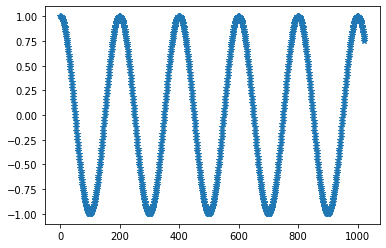

In [4]:
N = 1024
A = 1
f0 = 10
fs = 2000
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)
plt.plot(x,'*')
plt.show()

Take DFT and plot the real part:

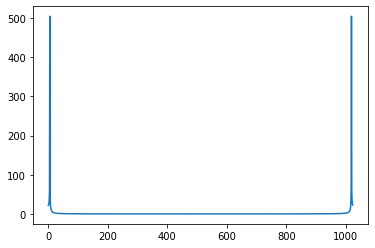

In [5]:
X_DFT = abs(DFT(x))
plt.plot(X_DFT)
plt.show()

Now test if our DFT have same output as build-in function:

In [6]:
np.allclose(DFT(x), np.fft.fft(x))

True

the FFT method with cutoff length 1

In [7]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if N <= 1:  # this cutoff should be optimized
        return DFT(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])

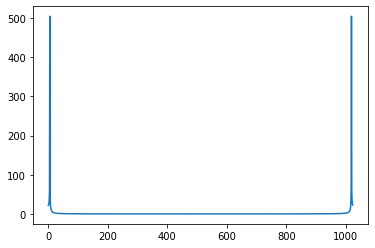

In [8]:
X_FFT = abs(FFT(x))
plt.plot(X_FFT)
plt.show()

In [9]:
np.allclose(FFT(x), np.fft.fft(x))

True

Below is performance test

In [11]:
N = [128, 256, 512, 1024, 2048, 4096, 8192]
A = 1
f0 = 10
fs = 2000
phi = 0
run_time_dft = []

for n in N:
    x = generate_sinusoid(n, A, f0, fs, phi)
    time_start = time.time()
    X_DFT = DFT(x)
    time_finish = time.time()
    time_run = time_finish - time_start
    run_time_dft.append(time_run)
    '''
    plt.subplot(2,1,1)
    plt.plot(x,'*')
    plt.title('input signal')
    plt.subplot(2,1,2)
    plt.plot(X_dft_real)
    plt.title('DFT')
    plt.show()
    '''

In [12]:
print(run_time_dft)
np.savetxt('./result/runtime_dft.txt', run_time_dft, fmt='%f')

[0.0, 0.004987001419067383, 0.013993024826049805, 0.05282711982727051, 0.22539710998535156, 0.8218040466308594, 3.1835544109344482]


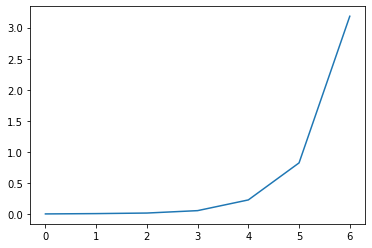

In [13]:
plt.plot(run_time_dft)
plt.show()

In [17]:
N = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
run_time_fft = []
for n in N:
    x = generate_sinusoid(n, A, f0, fs, phi)
    time_start = time.time()
    X_FFT = FFT(x)
    time_finish = time.time()
    time_run = time_finish - time_start
    run_time_fft.append(time_run)
    '''
    plt.subplot(2,1,1)
    plt.plot(x,'*')
    plt.title('input signal')
    plt.subplot(2,1,2)
    plt.plot(X_fft_real)
    plt.title('DFT')
    plt.show()
    '''

In [18]:
print(run_time_fft)
np.savetxt('./result/runtime_fft.txt', run_time_fft, fmt='%f')

[0.0019958019256591797, 0.005013227462768555, 0.008948802947998047, 0.016958951950073242, 0.031909942626953125, 0.06382989883422852, 0.13164687156677246, 0.2652919292449951]


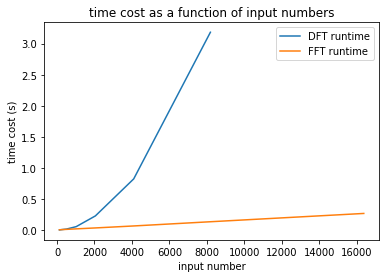

In [22]:
DFT_N = [128, 256, 512, 1024, 2048, 4096, 8192]
FFT_N = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
plt.plot(DFT_N, run_time_dft, label = 'DFT runtime')
plt.plot(FFT_N, run_time_fft, label = 'FFT runtime')
plt.title('time cost as a function of input numbers')
plt.xlabel('input number')
plt.ylabel('time cost (s)')
plt.legend(loc='upper right')
#plt.savefig('./plot.jpg')
plt.show()

In [27]:
N = 100000
A = 1
f0 = 10
fs = 2000
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)
time_start = time.time()
np.fft.fft(x)
time_finish = time.time()
time_run = time_finish - time_start
print(time_run)

0.001994609832763672
